### Loading the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Loading the data

In [2]:
df=pd.read_csv('C:\\Users\\muppa\\Downloads\\chatbot_training_data (1) (1) (1).csv')

In [3]:
df.head()

,Text,Label
0,Can I have meeting with coretta,appointment_with_Academic_advisor
1,Can I have appointment with coretta,appointment_with_Academic_advisor
2,Can I have an appointment with acadamic advisor,appointment_with_Academic_advisor
3,how many slots available for batminton this week,To_book_a_slot_for_recreation
4,how many slots available for swimming this week,To_book_a_slot_for_recreation


In [4]:
df['Label'].value_counts()

To_book_a_slot_for_recreation        232
appointment_with_Academic_advisor     30
greet                                 19
thank_you                             15
Name: Label, dtype: int64

C:\Users\muppa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


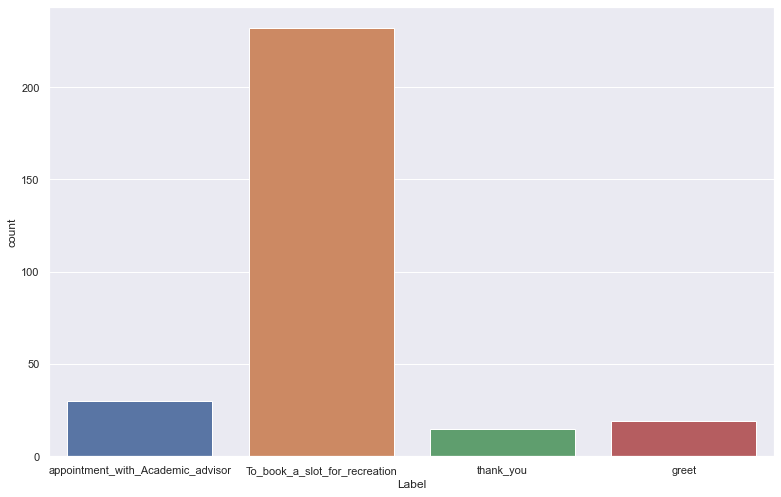

In [5]:
sns.set(rc={'figure.figsize':(13,8.27)})
sns.countplot(df['Label'])

## Preprocessing

In [6]:
df['new_Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [13]:
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))

In [14]:
## Removing the stopwords
df['new_Text'] = df['new_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [15]:
## Removing special characters
df['new_Text'] = df['new_Text'].str.replace('[^\w\s]','')

In [16]:
df['new_Text'] = df['new_Text'].apply(lambda x: re.sub(r"\d+", "", x).strip())

In [17]:
df.shape

(295, 3)

In [18]:
## Dropping the records with empty strings as shown below
df=df[df['new_Text']!='']

In [19]:
df.shape

(295, 3)

### Cleaned text

In [20]:
df['new_Text'].head()

0                        meeting coretta
1                    appointment coretta
2           appointment acadamic advisor
3    many slots available batminton week
4     many slots available swimming week
Name: new_Text, dtype: object

## Splitting train and Test data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['new_Text'],df['Label'],train_size=0.70, stratify=df['Label'])

## Feature Extraction using CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Model Training

In [24]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

## Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [26]:
NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy)
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.9902912621359223
Validation accuracy Score :  0.9775280898876404
                                   precision    recall  f1-score   support

    To_book_a_slot_for_recreation       1.00      0.99      0.99        71
appointment_with_Academic_advisor       1.00      1.00      1.00         9
                            greet       1.00      0.83      0.91         6
                        thank_you       0.60      1.00      0.75         3

                         accuracy                           0.98        89
                        macro avg       0.90      0.95      0.91        89
                     weighted avg       0.99      0.98      0.98        89



In [28]:
import pickle
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))

In [27]:
import pickle
pickle.dump(naiveByes_clf, open('chat_bot_final.sav', 'wb'))

In [29]:
import os
print(os.getcwd())

C:\Users\muppa
